# SPRINT 6 : Algoritmos de aprendizaje supervisado - Regresión

Exportamos la tabla preprocesada del Sprint 5

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('nueva_tabla.csv', sep=',', encoding='latin-1')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.064471,0.0,0.242302,0,0.172840,0.287838,0.782698,0.568110,0.043478,0.104962,-0.464286,0.261973,-0.225126,21.6
1,-0.064477,0.0,0.242302,0,0.172840,1.320270,0.599382,0.568110,0.043478,0.104962,-0.464286,0.067050,-0.738693,34.7
2,-0.063064,0.0,0.063050,0,0.150206,1.067568,0.441813,0.920017,0.086957,0.066794,-0.142857,0.153257,-0.848241,33.4
3,-0.052864,0.0,0.063050,0,0.150206,1.268919,0.528321,0.920017,0.086957,0.066794,-0.142857,0.261973,-0.608040,36.2
4,-0.063765,0.0,0.063050,0,0.150206,0.300000,0.574665,0.920017,0.086957,0.066794,-0.142857,0.128831,-0.620101,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,0.420455,0,0.386831,0.520270,0.681771,-0.231563,0.000000,0.164122,0.678571,0.026820,-0.171859,22.4
501,-0.059477,0.0,0.420455,0,0.386831,-0.118919,0.760041,-0.292972,0.000000,0.164122,0.678571,0.261973,-0.231156,20.6
502,-0.055169,0.0,0.420455,0,0.386831,1.037838,0.907312,-0.331534,0.000000,0.164122,0.678571,0.261973,-0.576884,23.9
503,-0.041591,0.0,0.420455,0,0.386831,0.791892,0.889804,-0.260388,0.000000,0.164122,0.678571,0.096743,-0.492462,22.0


Separamos la columna de MEDV que será nuestro target

In [5]:
X= df.drop(['MEDV'], axis=1) 
y=df[['MEDV']]

Definimos los datos del Training Test y Test Set:


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (101, 13) (404, 1) (101, 1)


### EXERCICI 1

#### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

- Se crea un modelo de regresión lineal simple. La clase LinearRegression() se usa para crear un modelo de **regresión simple**, la clase se importa del paquete sklearn.linear_model. 

- Después de crear el modelo, se ajusta a los datos train. El modelo adquiere conocimiento sobre las estadísticas del Training Model. El método fit() se utiliza para ajustar los datos.

- En este método model.predict() se usa para hacer predicciones sobre los datos X_test, ya que los datos de prueba son datos invisibles y el modelo no tiene conocimiento sobre las estadísticas del conjunto de prueba.


In [38]:
model=LinearRegression() # initialize the model

model.fit(X_train,y_train) # fit he model

y_pred_lr=model.predict(X_test) # now predictlen

y_pred_lr[:10]

array([[28.36391692],
       [30.74316489],
       [18.95127419],
       [28.73060699],
       [17.58486942],
       [21.02354495],
       [21.26058396],
       [10.06502206],
       [37.28255458],
       [24.20512831]])

In [8]:
#Para obtener el intercepto:
print(model.intercept_)

#Para obtener la pendiente
print(model.coef_)

[25.58014756]
[[-0.38867371  0.49963331  0.75884696  3.80822934 -8.78988926  2.78138508
   0.54242063 -4.30926663  6.51428098 -5.90798164 -2.87334867  0.17638266
  -5.18686372]]


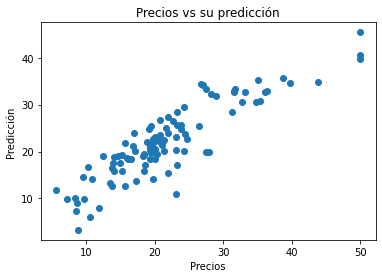

In [9]:
plt.scatter(y_test, y_pred_lr)  
plt.xlabel('Precios')  
plt.ylabel('Predicción ') 
plt.title('Precios vs su predicción') 
plt.show()
#agregar linea de tendencia

Link https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn

El próximo método que usaremos será el **Random Forest**:

Random Forest es un algoritmo de aprendizaje automático que pertenece a la familia de los árboles de decisión. Se utiliza para realizar tareas de clasificación y regresión en problemas de aprendizaje supervisado.

El objetivo de Random Forest es combinar múltiples árboles de decisión para crear un modelo más robusto y preciso que un solo árbol de decisión. Cada árbol de decisión en el bosque se entrena en un subconjunto aleatorio de los datos de entrenamiento y hace predicciones basadas en una combinación de características. Finalmente, las predicciones de cada árbol se combinan para producir una predicción final.

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)

y_pred_rf[:10]

array([22.547, 44.333, 14.358, 32.619, 13.925, 21.027, 22.013,  9.072,
       24.906, 17.522])

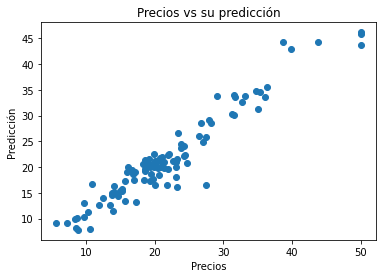

In [11]:
plt.scatter(y_test, y_pred_rf)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs su predicción') 
plt.show()
#agregar linea de tendencia

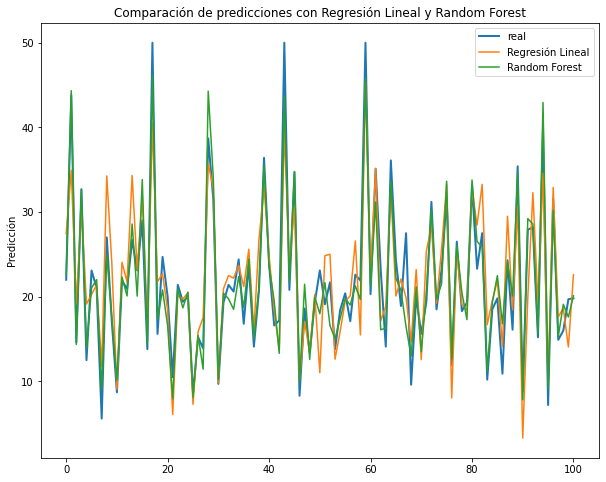

In [12]:
plt.figure(figsize = (10,8))
plt.plot(y_test.iloc[:].values, linewidth=2, label='real')
plt.plot(y_pred_lr, label='Regresión Lineal')
plt.plot(y_pred_rf, label='Random Forest')
plt.ylabel('Predicción')
plt.title('Comparación de predicciones con Regresión Lineal y Random Forest')
plt.legend()
plt.show()

### EXERCICI 2

#### Compara’ls en base al MSE i al R2.

 Con el fin de evaluar el rendimiento del algoritmo. Lo haremos encontrando los valores de **MSE** y **R-Squared**

The **mean squared error (MSE)** o **Error cuadrático medio** de un estimador mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. El ECM es una función de riesgo, correspondiente al valor esperado de la pérdida del error al cuadrado o pérdida cuadrática.

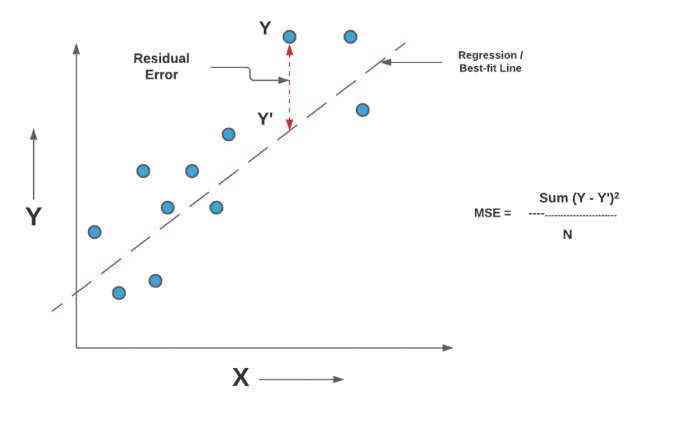

El **R-Squared, R2 o Coeficiente de determinación** mide lo bien que un modelo de regresión se ajusta a los datos reales. En otras palabras, se trata de una medida de la precisión general del modelo.
Por lo tanto, es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. Es decir:

R-cuadrado = Variación explicada / variación total

El R-cuadrado siempre está entre 0 y 100%:

-0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.


-100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

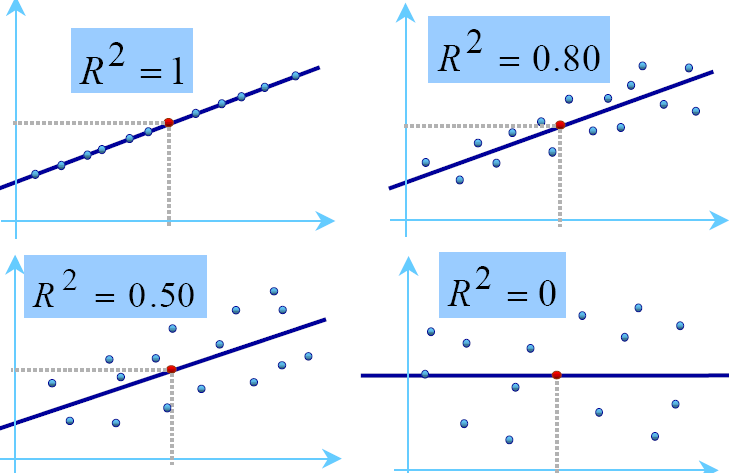

Procedemos a sacar el **MSE** y **r2 score** para los valroes obtenidos con al Regresión lineal:

In [13]:
from sklearn import tree, model_selection, metrics
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_lr)) 
print('R2 Score:', metrics.r2_score(y_test, y_pred_lr))

Mean Squared Error (MSE): 17.54116456957362
R2 Score: 0.7881079806901222


Luego, realizamos lo mismo para los valores obtenidos con Random Forest:

In [14]:
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf)) 
print('R2 Score:', metrics.r2_score(y_test, y_pred_rf))

#curva del roc , para verificar como son los datos

Mean Squared Error (MSE): 6.898015970297028
R2 Score: 0.9166740311123167


A partir de lo valores obtenidos para MSE y R2, podemos concluir que el método de Random Forest se adapta mejor a la predicción obtenida, ya que el valor de la mean squared error es menor, y el r2 está bastante más cerca del 1 que para la regresión lineal.


### EXERCICI 3

#### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Los **hiperparámetros** son parámetros de un estimador que no se van aprendiendo según se entrena el modelo, si no que son predefinidos antes de empezar el entrenamiento. 

Ahora que queremos introducir la búsqueda de hiperparámetros, es necesario introducir otra muestra para validar la combinación de hiperparámetros y encontrar la óptima. Esta muestra se llama muestra de validación, y la técnica se llama **cross validation**. Es decir, validamos la combinación con datos con los que no hemos entrenado, y después testamos el modelo entero con otros datos para medir cómo de bueno es el modelo.

**Búsqueda de hiperparámetros**

Existen principalmente dos técnicas de búsqueda de hiperparámetros que encuentran una combinación de manera eficiente y especializada para cada modelo. Se trata de **GridSearch** (búsqueda exhaustiva) y **RandomSearch** (búsqueda aleatoria) que son muy parecidas pero con un toque diferente que hace que una de ellas sea mucho más rápida que la otra a expensas de no encontrar la mejor combinación de todas.

**GridSearch**

Este tipo de búsqueda prueba todas las posibles combinaciones de valores que se le proporcione en el grid de parámetros

**Random Search**

Este tipo de búsqueda prueba combinaciones de valores al azar que se le proporcione en el grid de parámetros. Al ser una búsqueda aleatoria, es muy posible que no nos quedemos con la combinación de hiperparámetros óptima para nuestros datos. Pero ahorraremos mucho tiempo, sobre todo cuanto más tarde el modelo en entrenar y más posibles hiperparámetros especifiquemos.


*¿Pero si no es el más óptimo por qué lo utilizamos?*

Para ahorrar tiempo. Cuando tenemos un grid de parámetros muy grande y se trata de un modelo que tarde mucho en ser entrenado, confiamos en que la búsqueda aleatoria dé en el clavo y encuentre una combinación (pseudo) óptima sin tener que ejecutar todas las iteraciones que tendríamos que hacer con un grid search tradicional.

Primero utilizando GridSearch:

In [15]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#https://www.youtube.com/watch?v=OtCq4NGvTaA

#modelo random forest
gs_model=RandomForestRegressor(random_state=42)


#parametros para el mejor estimador
params = {  'n_estimators': [50, 200, 300, 400,500,600,700],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 4, 8]}


grid_search = GridSearchCV(estimator=gs_model, param_grid=params, n_jobs=-1, cv=5)
#search = GridSearchCV(estimator=gs_model, param_grid=params, n_jobs=-1, cv=5)

grid_search2=grid_search.fit(X_train, y_train)
#search_model2=search.fit(X_train, y_train)


In [16]:
grid_search2.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 700}

In [17]:
grid_search2.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=700, random_state=42)

In [19]:
y_pred_gs=grid_search2.predict(X_test)

In [20]:
# Evaluate the best model on the test data
test_accuracy = best_model.score(X_test, y_test)

NameError: name 'best_model' is not defined

Veremos cuan bueno es el modelo, comparandolo con los valores anteriormente obtenidos de MSE y R2, utilizando el estimador que es mejor: 700

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_gs= r2_score(y_test,y_pred_gs)

mse_gs=mean_squared_error(y_test, y_pred_gs)

print(f'Grid Search r2: {r2_gs}, Grid search mse:{mse_gs}')

Grid Search r2: 0.9187352527619783, Grid search mse:6.727380812404625


Anteriormente los valores de r2 y MSE con random forest nos había dado:
Mean Squared Error (MSE): 6.9107611980198005
R2 Score: 0.9165200725750696

Por lo que ambos parámetros han mejorado.

1-Importe la librería scikit-learn y cargue sus datos en una variable.

2-Cree un objeto RandomForestClassifier o RandomForestRegressor.

3-Defina un espacio de búsqueda para los hiperparámetros que desea optimizar, especificando los valores posibles para cada hiperparámetro.

4-Cree un objeto GridSearchCV y especifique el modelo de Random Forest, el espacio de búsqueda de hiperparámetros, y la métrica para evaluar el rendimiento.

5-Ajuste el objeto GridSearchCV al conjunto de datos de entrenamiento.

6-Obtenga la mejor combinación de hiperparámetros y el mejor modelo entrenado utilizando los atributos best_params_ y best_estimator_ del objeto GridSearchCV.

7-Evalúe el modelo final en el conjunto de datos de prueba o en datos no vistos antes.

**Luego, utilizando RandomSearch:**

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

model_rs = GradientBoostingRegressor()
params_rs = {'n_estimators': [50, 200, 300, 400,500,600,700],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 4, 8]
                 }
random_src = RandomizedSearchCV(estimator=model_rs, param_distributions = params_rs,
                               cv = 2, n_iter = 10, n_jobs=-1)
random_src2=random_src.fit(X_train, y_train)

In [23]:
random_src2.best_params_

{'n_estimators': 50, 'min_samples_split': 8, 'max_depth': 5}

In [24]:
random_src2.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_split=8, n_estimators=50)

In [25]:
y_pred_rf=random_src2.predict(X_test)

In [26]:
r2_rfc= r2_score(y_test,y_pred_rf)

mse_rfc=mean_squared_error(y_test, y_pred_rf)

print(f'Random Search r2: {r2_rfc}, Random search mse:{mse_rfc}')

Random Search r2: 0.9159059611828528, Random search mse:6.961599493062766


### EXERCICI 4

#### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

La **cross-validation** es un método utilizado en machine learning para evaluar la capacidad de generalización de un modelo. Se utiliza para estimar la precisión del modelo en datos que no se han utilizado durante el entrenamiento, lo que proporciona una medida más precisa de su rendimiento en la predicción de nuevos casos. La cross-validación se logra dividiendo los datos en varios grupos, entrenando el modelo en un conjunto de datos y evaluando su rendimiento en un conjunto de datos diferente. Este proceso se repite varias veces para obtener una estimación más precisa del rendimiento del modelo.

In [28]:
 from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(model, X_test, y_test, cv=10)
print("Precisión media:", np.mean(scores))

Precisión media: 0.7493820341894138


In [30]:
cv_lr = cross_val_score(model_rs, X, y, cv=7, scoring='r2')
cv_rf = cross_val_score(gs_model, X, y, cv=7, scoring='r2')

In [31]:
cv_lr

array([0.75251698, 0.67636633, 0.82399022, 0.77395442, 0.59459885,
       0.31371537, 0.51641571])

### EXERCICI 5

#### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Separamos la columna MEDV y RM

In [34]:
X1= df.drop(['MEDV', 'RM'], axis=1) 
y1=df[['MEDV']]

Definimos los datos del Training Test y Test Set:


In [41]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.20)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(404, 12) (101, 12) (404, 1) (101, 1)


Realizamos Linear Regression:

In [42]:
model1=LinearRegression() # initialize the model

model1.fit(X1_train, y1_train) # fit he model

y_pred_lr1=model.predict(X1_test) # now predictlen

y_pred_lr1[:10]

array([[28.36391692],
       [30.74316489],
       [18.95127419],
       [28.73060699],
       [17.58486942],
       [21.02354495],
       [21.26058396],
       [10.06502206],
       [37.28255458],
       [24.20512831]])

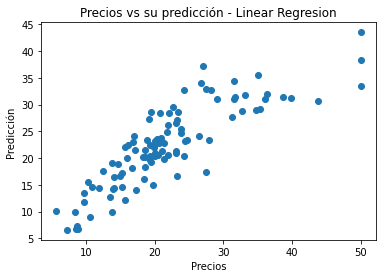

In [47]:
plt.scatter(y1_test, y_pred_lr1)  
plt.xlabel('Precios')  
plt.ylabel('Predicción ') 
plt.title('Precios vs su predicción - Linear Regresion') 
plt.show()

Luego Random Forest:


In [44]:
rf_model1 = RandomForestRegressor()
rf_model1.fit(X1_train,y1_train)

y_pred_rf1=rf_model1.predict(X1_test)

y_pred_rf1[:10]

array([23.841, 38.059, 14.7  , 26.911, 13.728, 23.226, 21.346,  9.263,
       36.717, 17.35 ])

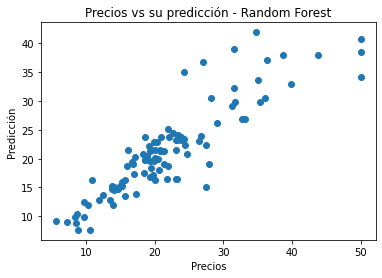

In [46]:
plt.scatter(y1_test, y_pred_rf1)  
plt.xlabel('Precios')  
plt.ylabel('Predicción') 
plt.title('Precios vs su predicción - Random Forest') 
plt.show()

In [50]:
print('Mean Squared Error (MSE) con regresión lineal:', metrics.mean_squared_error(y1_test, y_pred_lr1)) 
print('R2 Score con regresión lineal:', metrics.r2_score(y1_test, y_pred_lr1))

Mean Squared Error (MSE) con regresión lineal: 23.254517418180964
R2 Score con regresión lineal: 0.719092387835977


Luego sacamos el MSE y R2 con los valores obtenidos con Random Forest:

In [51]:
print('Mean Squared Error (MSE) con Random Forest:', metrics.mean_squared_error(y1_test, y_pred_rf1)) 
print('R2 Score con Random Forest:', metrics.r2_score(y1_test, y_pred_rf1))

Mean Squared Error (MSE) con Random Forest: 17.426128455445546
R2 Score con Random Forest: 0.7894975825275304


Siguiendo los pasos anteriormente hechos, se realizará Random Search y Grid Search, para mejorar los datos, pero ésta vez sin tener en cuenta la columna de 'RM'

In [55]:
#modelo random forest
gs_model1=RandomForestRegressor(random_state=42)


#parametros para el mejor estimador
params1= {  'n_estimators': [50, 200, 300, 400,500,600,700],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 4, 8]}


grid_search1= GridSearchCV(estimator=gs_model, param_grid=params1,n_jobs=-1, cv=5)
#search = GridSearchCV(estimator=gs_model, param_grid=params, n_jobs=-1, cv=5)

grid_search11=grid_search.fit(X1_train, y1_train)
#search_model2=search.fit(X_train, y_train)

In [60]:
gs_bp1=grid_search11.best_params_
gs_bp1

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

In [62]:
gs_be1=grid_search11.best_estimator_
gs_be1

RandomForestRegressor(max_depth=20, n_estimators=50, random_state=42)

Podemos ver como la variable 'RM' es sumamente importante en el análisis a realizar, ya que al quitarla empeora considerablemente el modelo.


Esto lo podemos ver claramente ploteando nuevamente la comparativa entre las predicciones y los reales:

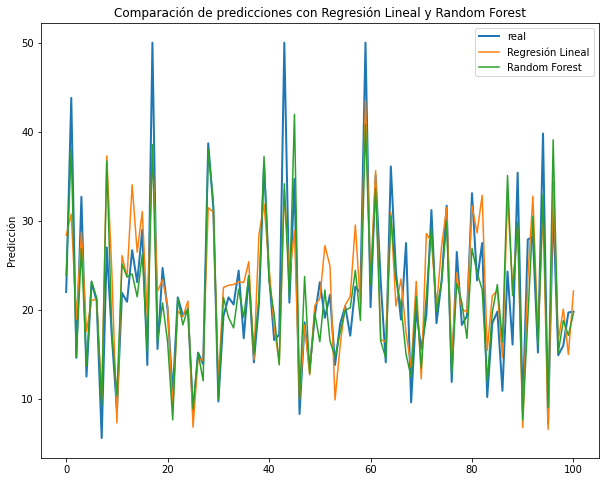

In [64]:
plt.figure(figsize = (10,8))
plt.plot(y1_test.iloc[:].values, linewidth=2, label='real')
plt.plot(y_pred_lr1, label='Regresión Lineal')
plt.plot(y_pred_rf1, label='Random Forest')
plt.ylabel('Predicción')
plt.title('Comparación de predicciones con Regresión Lineal y Random Forest')
plt.legend()
plt.show()

Volvemos a plotear la comparación utilizando RM para que ser observe la clara diferencia:

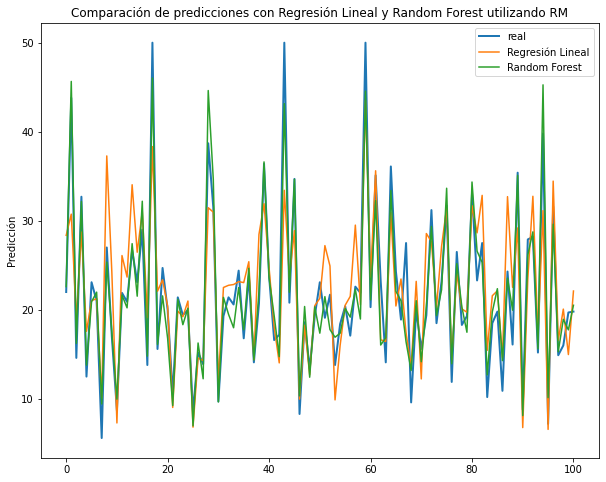

In [65]:
plt.figure(figsize = (10,8))
plt.plot(y_test.iloc[:].values, linewidth=2, label='real')
plt.plot(y_pred_lr, label='Regresión Lineal')
plt.plot(y_pred_rf, label='Random Forest')
plt.ylabel('Predicción')
plt.title('Comparación de predicciones con Regresión Lineal y Random Forest utilizando RM')
plt.legend()
plt.show()